In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
import itertools
import csv
import os
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline
    
from __future__ import division
from __future__ import print_function
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from importlib import reload

print ("pandas version ",pd.__version__)

pandas version  1.1.3


In [52]:
# The next code works well, but produces a lot of warning signs, which I tried to prevent with this:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load ucldata into python
ucldata= pd.read_csv(r'/Users/andrea/Downloads/ucl-soccer-1955-2019.csv')

In [3]:
# make sure data was uploaded and is correct
ucldata.head()
ucldata.tail()

,club,nation,coach,formation,mvp,position,season
123,Juventus,Italy,Massimiliano Allegri,'3-4-3',unknown,runner up,'2016/2017'
124,Real Madrid CF,Spain,Zinédine Zidane,'4-3-3',Gareth Bale,winner,'2017/2018'
125,Liverpool FC,England,Jürgen Klopp,'4-3-3',unknown,runner up,'2017/2018'
126,Liverpool FC,England,Jürgen Klopp,'4-3-3',Virgil van Dijk,winner,'2018/2019'
127,Tottenham Hotspur,England,Jürgen Klopp,'4-4-2',unknown,runner up,'2018/2019'


In [68]:
# Download champs data 
champs= pd.read_csv(r'/Users/andrea/Downloads/champs.csv', encoding='unicode_escape')
champs.head()
champs.tail()

,Date,Season,round,leg,home,visitor,FT,HT,aet,pens,...,FTagg_visitor,aethgoal,aetvgoal,tothgoal,totvgoal,totagg_home,totagg_visitor,tiewinner,hcountry,vcountry
6549,4/26/16,2015,SF,1,Manchester City,Real Madrid,0-0,0-0,NaN,NaN,...,1,NaN,NaN,0,0,0,1,Real Madrid,ENG,ESP
6550,4/27/16,2015,SF,1,Atletico Madrid,Bayern Munich,1-0,1-0,NaN,NaN,...,2,NaN,NaN,1,0,2,2,Atletico Madrid,ESP,GER
6551,5/3/16,2015,SF,2,Bayern Munich,Atletico Madrid,2-1,1-0,NaN,away goals,...,2,NaN,NaN,2,1,2,2,Atletico Madrid,GER,ESP
6552,5/4/16,2015,SF,2,Real Madrid,Manchester City,1-0,1-0,NaN,NaN,...,0,NaN,NaN,1,0,1,0,Real Madrid,ESP,ENG
6553,5/28/16,2015,final,NaN,Real Madrid,Atletico Madrid,1-1,1-0,1-1,5-3,...,1,1.0,1.0,1,1,1,1,Real Madrid,ESP,ESP


In [5]:
# assess champs data 
champs.shape
champs.info()
champs.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6554 non-null   object 
 1   Season          6554 non-null   int64  
 2   round           6554 non-null   object 
 3   leg             6492 non-null   object 
 4   home            6554 non-null   object 
 5   visitor         6554 non-null   object 
 6   FT              6554 non-null   object 
 7   HT              4788 non-null   object 
 8   aet             128 non-null    object 
 9   pens            205 non-null    object 
 10  hgoal           6554 non-null   int64  
 11  vgoal           6554 non-null   int64  
 12  FTagg_home      6554 non-null   int64  
 13  FTagg_visitor   6554 non-null   int64  
 14  aethgoal        128 non-null    float64
 15  aetvgoal        128 non-null    float64
 16  tothgoal        6554 non-null   int64  
 17  totvgoal        6554 non-null   i

Date                 0
Season               0
round                0
leg                 62
home                 0
visitor              0
FT                   0
HT                1766
aet               6426
pens              6349
hgoal                0
vgoal                0
FTagg_home           0
FTagg_visitor        0
aethgoal          6426
aetvgoal          6426
tothgoal             0
totvgoal             0
totagg_home          0
totagg_visitor       0
tiewinner         2186
hcountry             0
vcountry             0
dtype: int64

In [6]:
# Data cleaning
champs.isnull()
champs["round"].fillna("No round", inplace = True) 
champs["pens"].fillna("No penalties", inplace = True)
champs["aet"].fillna("No extra time", inplace = True)
champs["HT"].fillna("No info", inplace = True)
champs["leg"].fillna("No info", inplace = True)
champs["aethgoal"].fillna("No info", inplace = True)
champs["aetvgoal"].fillna("No info", inplace = True)
champs["tiewinner"].fillna("No tie", inplace = True)
# Confirming the data does not have NA values
champs.isnull().sum()

Date              0
Season            0
round             0
leg               0
home              0
visitor           0
FT                0
HT                0
aet               0
pens              0
hgoal             0
vgoal             0
FTagg_home        0
FTagg_visitor     0
aethgoal          0
aetvgoal          0
tothgoal          0
totvgoal          0
totagg_home       0
totagg_visitor    0
tiewinner         0
hcountry          0
vcountry          0
dtype: int64

In [7]:
# Check type for each column after cleaning
champs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            6554 non-null   object
 1   Season          6554 non-null   int64 
 2   round           6554 non-null   object
 3   leg             6554 non-null   object
 4   home            6554 non-null   object
 5   visitor         6554 non-null   object
 6   FT              6554 non-null   object
 7   HT              6554 non-null   object
 8   aet             6554 non-null   object
 9   pens            6554 non-null   object
 10  hgoal           6554 non-null   int64 
 11  vgoal           6554 non-null   int64 
 12  FTagg_home      6554 non-null   int64 
 13  FTagg_visitor   6554 non-null   int64 
 14  aethgoal        6554 non-null   object
 15  aetvgoal        6554 non-null   object
 16  tothgoal        6554 non-null   int64 
 17  totvgoal        6554 non-null   int64 
 18  totagg_h

In [8]:
# Check missing values for ucldata
ucldata.isnull()
ucldata.isnull().sum()

club         0
nation       0
coach        0
formation    0
mvp          0
position     0
season       0
dtype: int64

In [9]:
# Exploratory Data Analysis UCL Data
ucldata.info()
ucldata.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   club       128 non-null    object
 1   nation     128 non-null    object
 2   coach      128 non-null    object
 3   formation  128 non-null    object
 4   mvp        128 non-null    object
 5   position   128 non-null    object
 6   season     128 non-null    object
dtypes: object(7)
memory usage: 7.1+ KB


(128, 7)

In [10]:
# EDA cont.
ucldata.describe()
ucldata['club'].value_counts().head(5)

Real Madrid CF       16
AC Milan             11
FC Bayern Munchen    10
Liverpool FC          9
Juventus              9
Name: club, dtype: int64

In [11]:
# Top 5 nations that teams come from
ucldata['nation'].value_counts().head(5)

Spain       29
Italy       28
England     22
Germany     17
Portugal     9
Name: nation, dtype: int64

In [12]:
# Top 10 teams in the final 
ucldata['club'].value_counts().head(10)

Real Madrid CF          16
AC Milan                11
FC Bayern Munchen       10
Liverpool FC             9
Juventus                 9
Barcelona FC             7
SL Benfica               7
AFC Ajax                 6
FC Internazionale        5
Manchester United FC     5
Name: club, dtype: int64

In [13]:
# EDA champs data
champs['home'].value_counts().head(10)

Real Madrid          204
Bayern Munich        156
Barcelona            141
Manchester United    131
AC Milan             127
Juventus             117
SL Benfica           112
Dinamo Kiev          110
FC Porto             108
AFC Ajax              98
Name: home, dtype: int64

In [14]:
#Top 10 visiting teams
champs['visitor'].value_counts().head(10)

Real Madrid          193
Bayern Munich        155
Barcelona            137
Manchester United    130
AC Milan             122
Juventus             121
SL Benfica           116
Dinamo Kiev          110
FC Porto             107
Arsenal               97
Name: visitor, dtype: int64

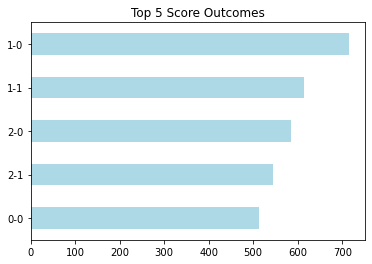

In [15]:
# Top 5 score outcomes for all games
champs['FT'].value_counts().head(5).sort_values().plot(kind = 'barh', color='lightblue')
plt.title('Top 5 Score Outcomes')

plt.show()

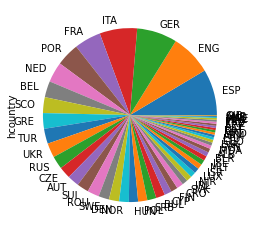

In [16]:
# Countries represented in tournament since 1955
champs.hcountry.value_counts(normalize=True)
champs.hcountry.value_counts(normalize=True).plot.pie()

plt.show()

In [17]:
# Taking a look at the aggregate values for home teams
champs.FTagg_home.describe()

count    6554.000000
mean        2.837809
std         2.249594
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        18.000000
Name: FTagg_home, dtype: float64

In [18]:
# Aggregate values for visitor teams which has a lower mean
champs.FTagg_visitor.describe()

count    6554.000000
mean        2.817211
std         2.246690
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        18.000000
Name: FTagg_visitor, dtype: float64

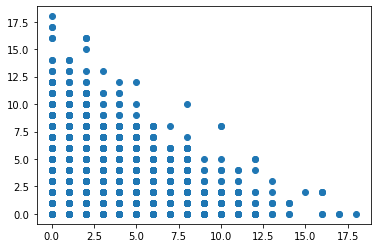

In [19]:
# scatter plt of aggregate goals for home and visitor
plt.scatter(champs.FTagg_home,champs.FTagg_visitor)
plt.show()

In [20]:
from pandas import DataFrame
from numpy import array
from sklearn.ensemble import RandomForestClassifier

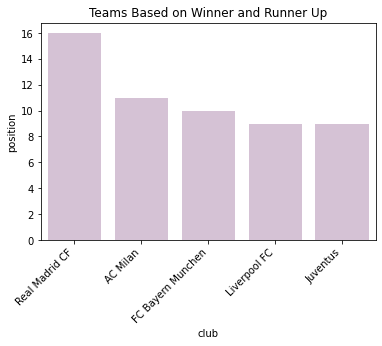

In [21]:
import matplotlib as mp
from matplotlib import colors as mcolors

# Plot producing the top 5 teams in the final which were either winner or runner up
res=ucldata.groupby(by='club', as_index=False).count()
res = res.sort_values(by='position', ascending=False).head()
plt.title('Teams Based on Winner and Runner Up')
ax = sns.barplot(x='club', y='position', data=res, color ='thistle')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.show()

,Season,hgoal,vgoal,FTagg_home,FTagg_visitor,tothgoal,totvgoal,totagg_home,totagg_visitor
Season,1.000000,-0.154011,-0.012750,-0.137295,-0.126029,-0.155911,-0.012735,-0.139742,-0.127340
hgoal,-0.154011,1.000000,-0.146639,0.847744,-0.201674,0.996321,-0.147527,0.845136,-0.203475
vgoal,-0.012750,-0.146639,1.000000,-0.164713,0.726069,-0.149384,0.998126,-0.166718,0.724028
FTagg_home,-0.137295,0.847744,-0.164713,1.000000,-0.217372,0.843896,-0.165548,0.997389,-0.219339
FTagg_visitor,-0.126029,-0.201674,0.726069,-0.217372,1.000000,-0.204230,0.724174,-0.219553,0.997934
tothgoal,-0.155911,0.996321,-0.149384,0.843896,-0.204230,1.000000,-0.149251,0.846435,-0.205514
totvgoal,-0.012735,-0.147527,0.998126,-0.165548,0.724174,-0.149251,1.000000,-0.166844,0.724138
totagg_home,-0.139742,0.845136,-0.166718,0.997389,-0.219553,0.846435,-0.166844,1.000000,-0.220750
totagg_visitor,-0.127340,-0.203475,0.724028,-0.219339,0.997934,-0.205514,0.724138,-0.220750,1.000000


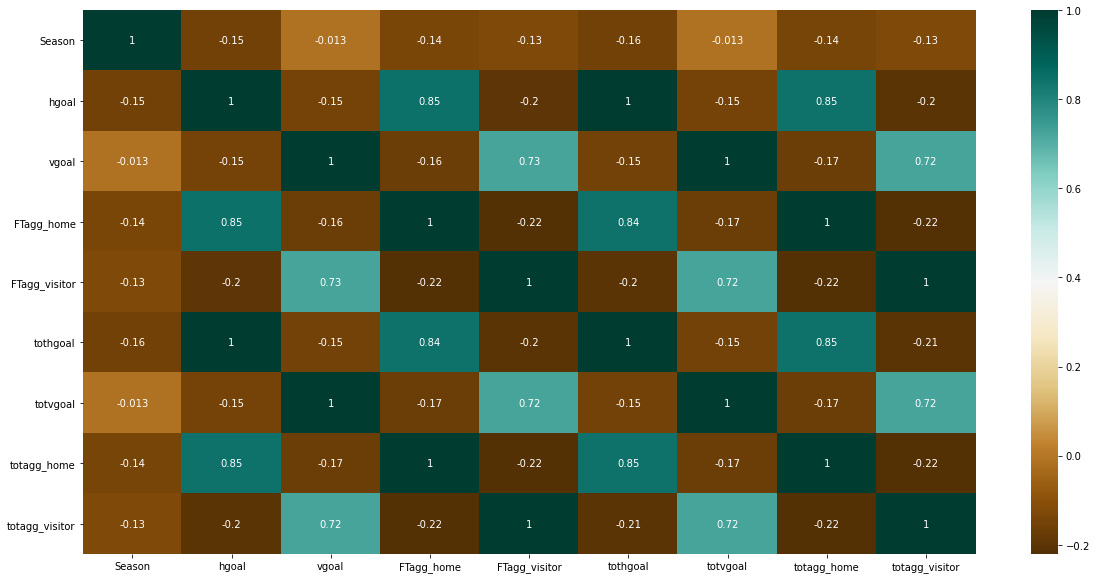

In [22]:
# Creatd a heat map in order to show 
plt.figure(figsize=(20,10))
c= champs.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

<AxesSubplot:xlabel='hgoal'>

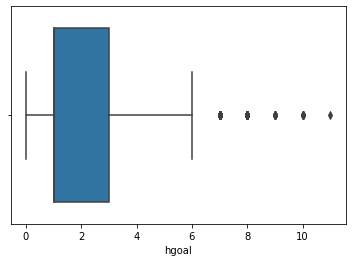

In [23]:
# Boxplot to look for outliers
sns.boxplot(x=champs['hgoal'])

<AxesSubplot:xlabel='vgoal'>

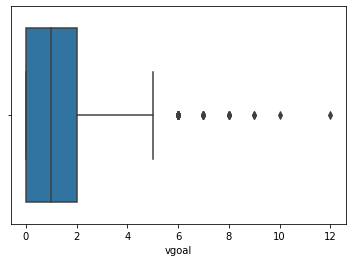

In [24]:
# Boxplot to look for outliers
sns.boxplot(x=champs['vgoal'])

In [25]:
# Print the 
q1 = champs.quantile(0.25)
q3=champs.quantile(0.75)
iqr=q3-q1
print(iqr)

Season            25.0
hgoal              2.0
vgoal              2.0
FTagg_home         3.0
FTagg_visitor      3.0
tothgoal           2.0
totvgoal           2.0
totagg_home        3.0
totagg_visitor     3.0
dtype: float64


In [26]:
# In order to run the model these columns needed to be deleted to not disrupt it. They are object types like data
champs = champs.drop(champs.columns[[0,1,2,3,8,9,14,15,20]], axis=1)

In [27]:
# Checking to see the new dataset 
champs.head()

,home,visitor,FT,HT,hgoal,vgoal,FTagg_home,FTagg_visitor,tothgoal,totvgoal,totagg_home,totagg_visitor,hcountry,vcountry
0,Sporting CP,Partizan Belgrade,3-3,1-1,3,3,5,8,3,3,5,8,POR,SRB
1,Budapesti Voros Lobogo,RSC Anderlecht,6-3,3-2,6,3,10,4,6,3,10,4,HUN,BEL
2,Servette Geneve,Real Madrid,0-2,0-0,0,2,0,7,0,2,0,7,SUI,ESP
3,Rot-Weiss Essen,Hibernian FC,0-4,0-2,0,4,1,5,0,4,1,5,GER,SCO
4,Djurgardens IF,Gwardia Warszawa,0-0,0-0,0,0,4,1,0,0,4,1,SWE,POL


In [28]:
### Preparing Data

In [29]:
# The data is now separated into feature set and target variable so we are trying to predict the full-time score

x_all = champs.drop(['FT', 'home', 'visitor', 'hcountry', 'vcountry', 'HT'], 1)
y_all = champs['FT']

In [30]:
# The data needs to be scaled so I used all of the integer columns to standardize
from sklearn.preprocessing import scale

cols=[['hgoal', 'vgoal', 'totvgoal', 'tothgoal', 'totagg_home', 'totagg_visitor']]
for col in cols:
    x_all[col] = scale(x_all[col])

In [31]:
# There are some characters in the dataset still so turning them into dummy variables so the model can run

def preprocess_features(X):
    '''Preprocesses the soccer data and converts catagorical variables into dummy variables.'''
    
    output = pd.DataFrame(index = X.index)
    
    for col, col_data in X.iteritems():
        
        
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
    

        # new columns and what it looks like now
        output = output.join(col_data)
    return output 

x_all = preprocess_features(x_all)
print ("Processed feature columns ({} total features):\n{}".format(len(x_all.columns), list(x_all.columns)))


Processed feature columns (8 total features):
['hgoal', 'vgoal', 'FTagg_home', 'FTagg_visitor', 'tothgoal', 'totvgoal', 'totagg_home', 'totagg_visitor']


In [32]:
# now all of the features are standarzied and 
print ("\nFeature values:")
display(x_all.head())


Feature values:


,hgoal,vgoal,FTagg_home,FTagg_visitor,tothgoal,totvgoal,totagg_home,totagg_visitor
0,0.789726,1.603975,5,8,0.781488,1.599196,0.953676,2.300493
1,2.691917,1.603975,10,4,2.681294,1.599196,3.175800,0.520185
2,-1.112465,0.776419,0,7,-1.118317,0.772543,-1.268448,1.855416
3,-1.112465,2.431532,1,5,-1.118317,2.425849,-0.824024,0.965262
4,-1.112465,-0.878695,4,1,-1.118317,-0.880762,0.509251,-0.815047


In [33]:
# the data will be split into training and testing sets as well as shuffled 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size = 100, random_state = 2)

In [34]:
# The data we split will now to trained and evaluated

from time import time

from sklearn.metrics import f1_score

def train_classifier(clf, x_train, y_train):
    ''' Fits a classifier to the training data.'''
    
    start = time()
    clf.fit(x_train, y_train)
    end = time()
    
    print ("Trained model in {:.4f} seconds".format(end - start))

def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score.'''
    
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H', average='micro'), sum(target == y_pred) / float(len(y_pred))

def train_predict(clf, x_train, y_train, x_test, y_test):
    '''Train and predict using a classifier based on F1 score.'''
    
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(x_train)))
    
    train_classifier(clf, x_train, y_train)
    
    f1, acc = predict_labels(clf, x_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for test set: {:.4f}, {:.4f}.".format(f1, acc))

In [38]:
# The 3 models used are a Logistic Regress, Random Forest, and a Decison tree using XGBoost
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

clf_A = LogisticRegression(random_state = 42, max_iter=2000)
clf_B = GaussianNB()
clf_C = xgb.XGBClassifier(seed = 82)

# The F1 score and accuracy will be printed 
train_predict(clf_A, x_train, y_train, x_test, y_test)
print ('')
train_predict(clf_B, x_train, y_train, x_test, y_test)
print('')
train_predict(clf_C, x_train, y_train, x_test, y_test)
print('')

Training a LogisticRegression using a training set size of 6454. . .
Trained model in 18.1893 seconds
Made predictions in 0.0033 seconds.
0.9383328168577626 0.9383328168577626
F1 score and accuracy score for test set: 0.9383, 0.9383.

Training a GaussianNB using a training set size of 6454. . .
Trained model in 0.0199 seconds
Made predictions in 0.0193 seconds.
1.0 1.0
F1 score and accuracy score for test set: 1.0000, 1.0000.

Training a XGBClassifier using a training set size of 6454. . .
[18:46:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Trained model in 2.7629 seconds
Made predictions in 0.0396 seconds.
0.9981406879454602 0.9981406879454602
F1 score and accuracy score for test 

In [39]:
# The XGBoost model produced a very high accuracy, but I changed the parameters to see the result

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer

parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth' : [3],
               'min_child_weight' : [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }

clf = xgb.XGBClassifier(seed=2)

f1_scorer = make_scorer(f1_score,pos_label='H', average='micro')

grid_obj = GridSearchCV(clf, scoring=f1_scorer, 
                             param_grid=parameters,
                             cv=5)
grid_obj = grid_obj.fit(x_train,y_train)

clf = grid_obj.best_estimator_
print (clf)

f1, acc = predict_labels(clf, x_train, y_train)
print ("F1 score and accuracy score for trainig set: {:.4f} , {:.4f}.".format(f1 , acc))

f1, acc = predict_labels(clf, x_test, y_test)
print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1, acc))

[18:46:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:46:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might n

In [42]:
# The other parameters produced lower F1 results and accuracy so this is another attempt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer

parameters = { 'learning_rate' : [0.03],
               'n_estimators' : [20],
               'max_depth' : [5],
               'min_child_weight' : [5],
               'gamma':[0.2],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-2]
             }

clf = xgb.XGBClassifier(seed=2)

f1_scorer = make_scorer(f1_score,pos_label='H', average='micro')

grid_obj = GridSearchCV(clf, 
                        scoring=f1_scorer, 
                             param_grid=parameters,
                             cv=5)

grid_obj = grid_obj.fit(x_all,y_all)

clf = grid_obj.best_estimator_
print (clf)

f1, acc = predict_labels(clf, x_train, y_train)
print ("F1 score and accuracy score for trainig set: {:.4f} , {:.4f}.".format(f1 , acc))

[18:46:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:46:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might n

In [43]:
# Save Model to use in the future with joblib
import joblib

filename = 'finalized_model.sav'
joblib.dump(clf_C, filename)


loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

1.0


In [45]:
from sklearn.model_selection import cross_val_predict

In [46]:
# Set up a Cross Validation to assess the accuracy of the model
predict = cross_val_predict(clf_A, x_all, y_all, cv=10)

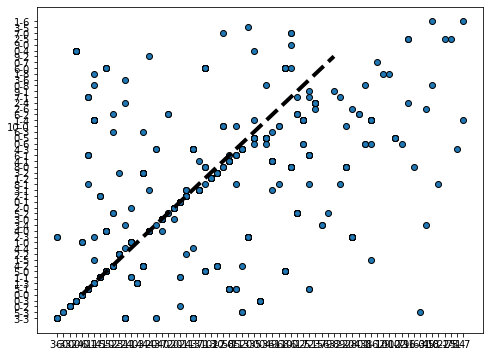

In [57]:
# Cross Validation plotted for the Logistic Regression Model
fig, ax = plt.subplots(figsize=[8,6])
ax.scatter(y_all, predict, edgecolors=(0,0,0))
ax.plot([y_all.min(), y_all.max()], [y_all.min(), y_all.max()], 'k--', lw=4)
plt.show()

In [48]:
# Set up a Cross Validation to assess accuracy of the second model
predicted = cross_val_predict(clf_B, x_all, y_all, cv=10)

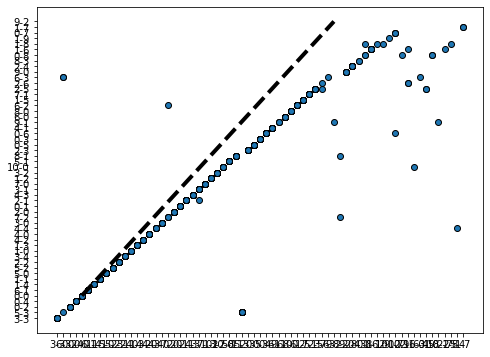

In [55]:
# Cross Validation plotted for the Naive Bayes model
fig, ax = plt.subplots(figsize=[8,6])
ax.scatter(y_all, predicted, edgecolors=(0,0,0))
ax.plot([y_all.min(), y_all.max()], [y_all.min(), y_all.max()], 'k--', lw=4)
plt.show()

In [53]:
# Set up Cross Validation for to assess accuracy for the third model
pred = cross_val_predict(clf_C, x_all, y_all, cv=10)

[18:51:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

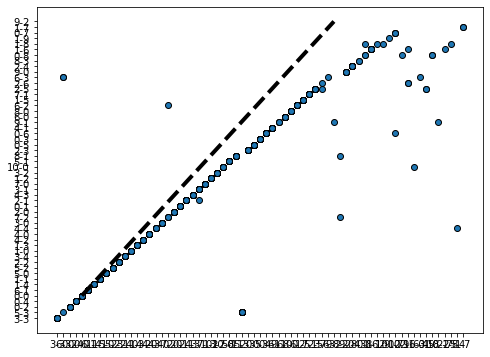

In [54]:
# Cross Validation plotted for the Decision Tree model
fig, ax = plt.subplots(figsize=[8,6])
ax.scatter(y_all, predicted, edgecolors=(0,0,0))
ax.plot([y_all.min(), y_all.max()], [y_all.min(), y_all.max()], 'k--', lw=4)
plt.show()

In [58]:
# Validating the performance of the Logistic Regression model 

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation 
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(clf_A, x_all, y_all, scoring='accuracy', cv=cv, n_jobs=-1)
# report the mean classification accuracy and standard deviation
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.924 (0.011)


In [59]:
# Validating the performance of the Decison Tree Model

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate the model
scores = cross_val_score(clf_C, x_all, y_all, scoring='accuracy', cv=cv, n_jobs=-1)
# report the mean classification accuracy and standard deviation
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.995 (0.003)


In [60]:
# Validating the performance of the Naive Bayes Model

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# prepare for cross-validation 
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate the model
scores = cross_val_score(clf_B, x_all, y_all, scoring='accuracy', cv=cv, n_jobs=-1)
# report the mean classificaiton accuracy and standard deviation
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.996 (0.003)


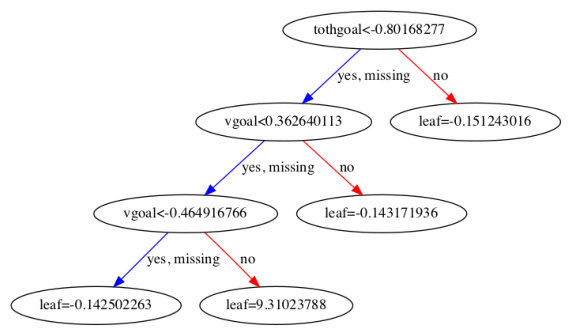

In [61]:
# Plotting the Decision Tree model results 

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import plot_tree
from sklearn.tree import export_graphviz

fig, ax = plt.subplots(figsize=(10,10))
plot_tree(clf_C,num_trees=1, ax=ax)
plt.show()